
Merged DataFrame Columns:
Index(['ID', 'Session', 'Track', 'Intervention', 'Lap', 'Sector 1', 'Sector 2',
       'Sector 3', 'Sector 4', 'Time', 'Time_seconds', 'HR rest', 'HR max',
       'RR rest', 'HR avg session', 'HR max session', 'RR avg session',
       'RR max session', 'Session potential', 'Session confidence ',
       'Session stress ', 'Extraversion', 'Risk tolerance',
       'Stress resilience', 'Open-mindedness', 'Conscientiousness',
       'Agreeableness', 'Emotional stability', 'Self-efficacy'],
      dtype='object')


/var/folders/nd/mxm61zld2bj2bp00mgb3w7yw0000gp/T/ipykernel_2832/3561038772.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(driver_data['Session stress '], driver_data['Time_seconds'])


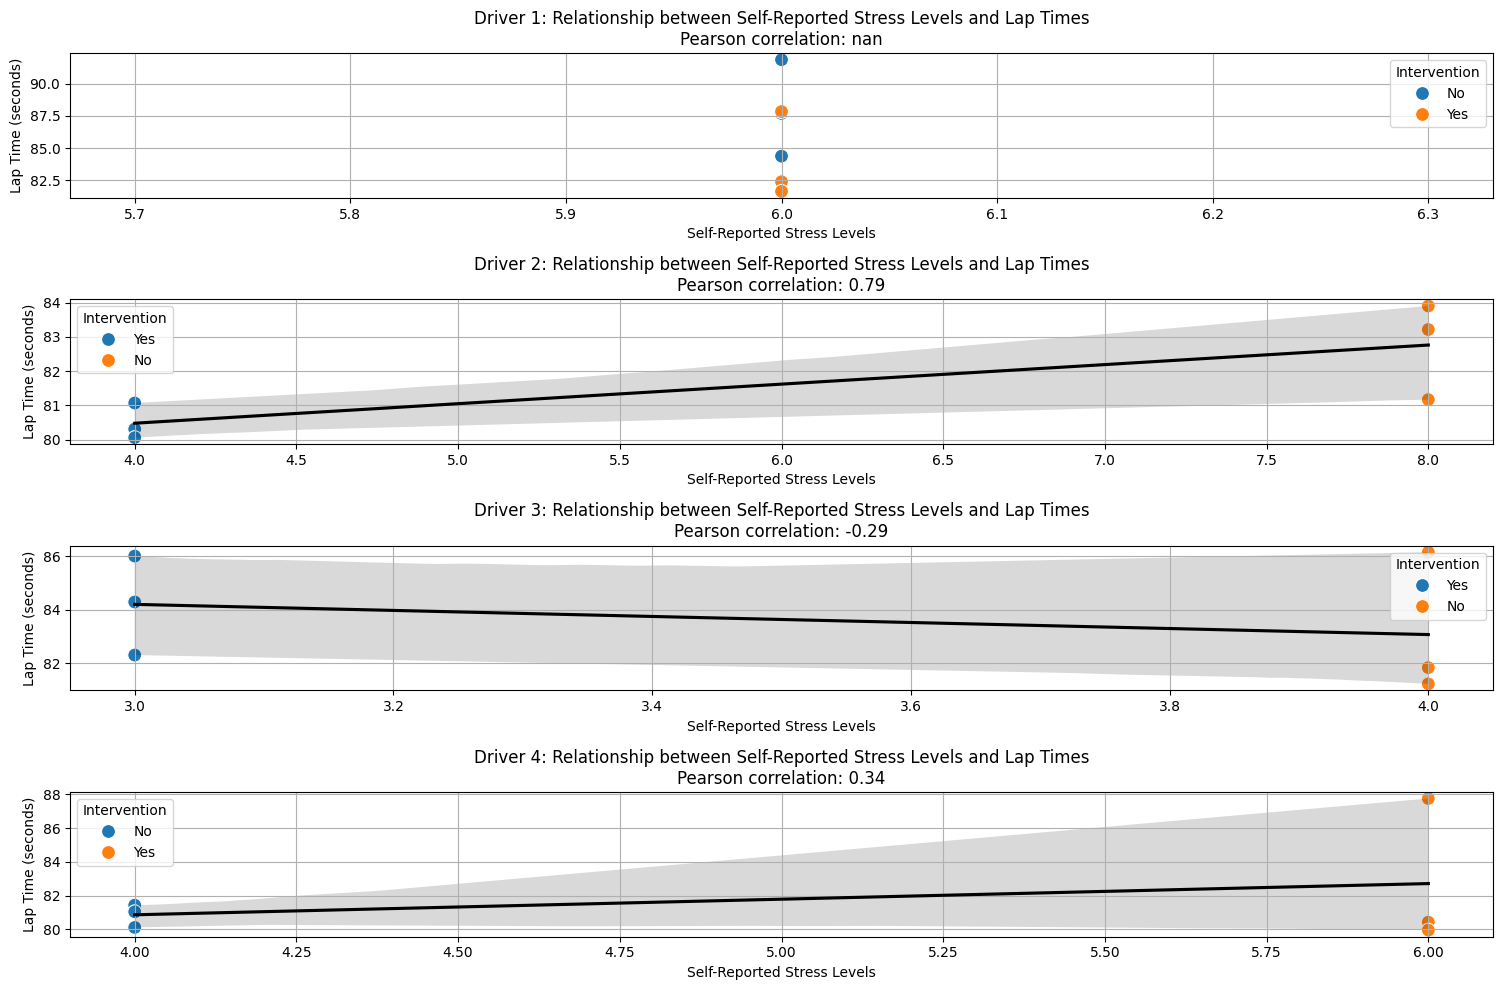

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the lap time data
lap_times_file_path = '/Users/home/desktop/CCIR-laptimes.csv'
lap_times_df = pd.read_csv(lap_times_file_path)

# Convert the 'Time' column to seconds
def time_to_seconds(time_str):
    min_sec = time_str.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

lap_times_df['Time_seconds'] = lap_times_df['Time'].apply(time_to_seconds)

# Load the biometric and self-report data
biometric_self_report_file_path = '/Users/home/desktop/CCIR-biometrics.csv'
biometric_self_report_df = pd.read_csv(biometric_self_report_file_path)

# Merge the dataframes
merged_df = pd.merge(lap_times_df, biometric_self_report_df, on=['ID', 'Session', 'Track', 'Intervention'])

# Print the merged dataframe columns to confirm
print("\nMerged DataFrame Columns:")
print(merged_df.columns)

# Plotting the relationship between self-reported stress levels and lap times
plt.figure(figsize=(15, 10))

# Get unique driver IDs
drivers = merged_df['ID'].unique()

for i, driver_id in enumerate(drivers):
    driver_data = merged_df[merged_df['ID'] == driver_id]
    
    plt.subplot(len(drivers), 1, i + 1)
    
    # Scatter plot
    sns.scatterplot(data=driver_data, x='Session stress ', y='Time_seconds', hue='Intervention', palette='tab10', s=100)
    
    # Add regression line
    sns.regplot(data=driver_data, x='Session stress ', y='Time_seconds', scatter=False, color='black')
    
    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(driver_data['Session stress '], driver_data['Time_seconds'])
    plt.title(f'Driver {driver_id}: Relationship between Self-Reported Stress Levels and Lap Times\nPearson correlation: {correlation:.2f}')
    
    plt.xlabel('Self-Reported Stress Levels')
    plt.ylabel('Lap Time (seconds)')
    plt.legend(title='Intervention')
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Merged DataFrame Columns:
Index(['ID', 'Session', 'Track', 'Intervention', 'Lap', 'Sector 1', 'Sector 2',
       'Sector 3', 'Sector 4', 'Time', 'Time_seconds', 'HR rest', 'HR max',
       'RR rest', 'HR avg session', 'HR max session', 'RR avg session',
       'RR max session', 'Session potential', 'Session confidence ',
       'Session stress ', 'Extraversion', 'Risk tolerance',
       'Stress resilience', 'Open-mindedness', 'Conscientiousness',
       'Agreeableness', 'Emotional stability', 'Self-efficacy'],
      dtype='object')


/var/folders/nd/mxm61zld2bj2bp00mgb3w7yw0000gp/T/ipykernel_2832/3902745263.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sns.regplot(data=driver_data, x='Session stress ', y='Time_seconds', scatter=False, label=f'Driver {driver_id} (R={pearsonr(driver_data["Session stress "], driver_data["Time_seconds"])[0]:.2f})')


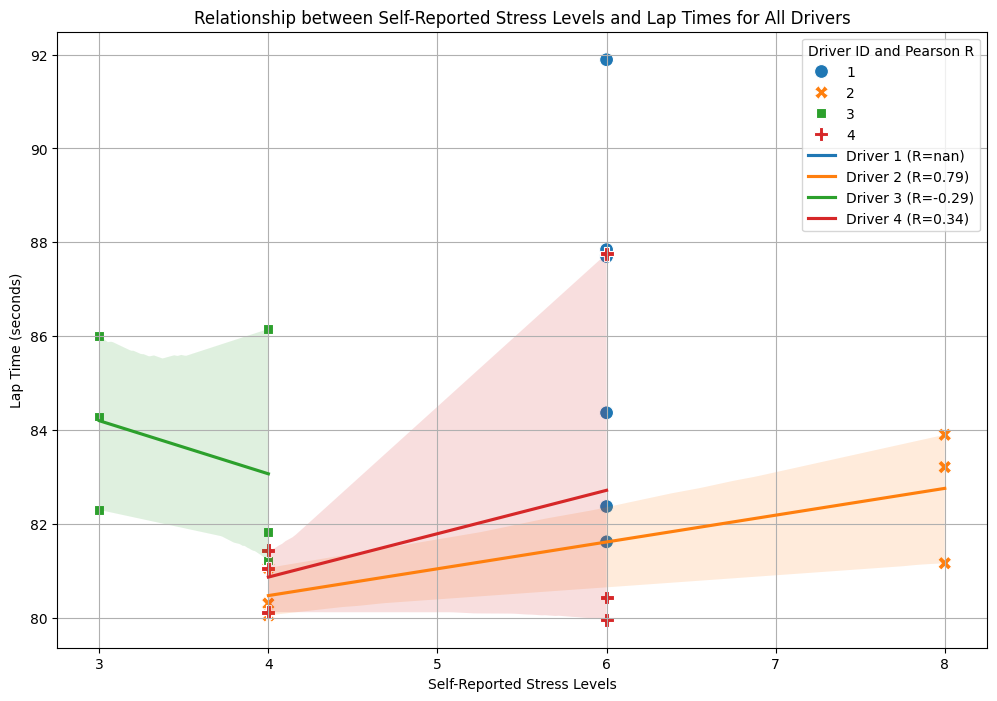

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the lap time data
lap_times_file_path = '/Users/home/desktop/CCIR-laptimes.csv'
lap_times_df = pd.read_csv(lap_times_file_path)

# Convert the 'Time' column to seconds
def time_to_seconds(time_str):
    min_sec = time_str.split(':')
    return int(min_sec[0]) * 60 + float(min_sec[1])

lap_times_df['Time_seconds'] = lap_times_df['Time'].apply(time_to_seconds)

# Load the biometric and self-report data
biometric_self_report_file_path = '/Users/home/desktop/CCIR-biometrics.csv'
biometric_self_report_df = pd.read_csv(biometric_self_report_file_path)

# Merge the dataframes
merged_df = pd.merge(lap_times_df, biometric_self_report_df, on=['ID', 'Session', 'Track', 'Intervention'])

# Print the merged dataframe columns to confirm
print("\nMerged DataFrame Columns:")
print(merged_df.columns)

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot the data
sns.scatterplot(data=merged_df, x='Session stress ', y='Time_seconds', hue='ID', style='ID', s=100, palette='tab10')

# Plot regression lines for each driver
for driver_id in merged_df['ID'].unique():
    driver_data = merged_df[merged_df['ID'] == driver_id]
    sns.regplot(data=driver_data, x='Session stress ', y='Time_seconds', scatter=False, label=f'Driver {driver_id} (R={pearsonr(driver_data["Session stress "], driver_data["Time_seconds"])[0]:.2f})')

# Add plot titles and labels
plt.title('Relationship between Self-Reported Stress Levels and Lap Times for All Drivers')
plt.xlabel('Self-Reported Stress Levels')
plt.ylabel('Lap Time (seconds)')
plt.legend(title='Driver ID and Pearson R')
plt.grid(True)

# Show the plot
plt.show()


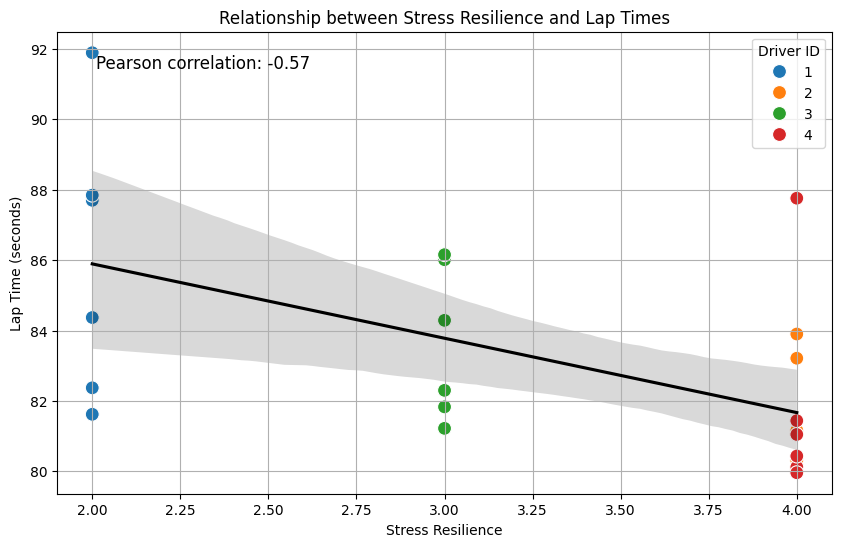

In [4]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot the scatter plot with different colors for each driver
sns.scatterplot(data=merged_df, x='Stress resilience', y='Time_seconds', hue='ID', palette='tab10', s=100, legend='full')

# Add a regression line
sns.regplot(data=merged_df, x='Stress resilience', y='Time_seconds', scatter=False, color='black')

# Calculate and display the Pearson correlation coefficient
correlation, _ = pearsonr(merged_df['Stress resilience'], merged_df['Time_seconds'])
plt.text(0.05, 0.95, f'Pearson correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add title and labels
plt.title('Relationship between Stress Resilience and Lap Times')
plt.xlabel('Stress Resilience')
plt.ylabel('Lap Time (seconds)')
plt.legend(title='Driver ID')
plt.grid(True)

# Show the plot
plt.show()


In [14]:
from scipy.stats import wilcoxon 

lap_times_df=pd.read_csv("/Users/home/Desktop/CCIR-laptimes.csv")

def time_to_seconds(time_str): 
    minute, sec_millisec = time_str.split(':') 
    seconds, milliseconds = sec_millisec.split('.') 
    total_seconds = int(minute) * 60 + int(seconds) + float(milliseconds) / 1000 
    return total_seconds 
# Apply the function to the 'time' column 
lap_times_df['time_in_seconds'] = lap_times_df['Time'].apply(time_to_seconds)

preintervention = lap_times_df[lap_times_df["Intervention"]=="No"]["time_in_seconds"].values
postintervention = lap_times_df[lap_times_df["Intervention"]=="Yes"]["time_in_seconds"].values
stat, p=wilcoxon(preintervention, postintervention)

print(f"Statistic: {stat}, p-value: {p}")

Statistic: 25.0, p-value: 0.30126953125
